# Open Market Backtesting

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import wrds
import sys
sys.path.append('..')

# Import Main Python Modules
from src.dataframe_construction import *
from src.a_estimation import *
from src.optimal_strategies import *
from src.backtest import *


### Setting up the data

In [2]:
daily = False
datapath='../data/'
backtest_start_year = 2000

if daily:
    d = 3000
    start_date_a_estimation='2013-01-01'
    end_date_a_estimation=str(backtest_start_year)+'-01-01'
    start_date_backtest=end_date_a_estimation
    end_date_backtest='2025-01-01'
    start_date='2013-01-01'
    filename='CRSP_2013_2018_daily_cleaned.h5'
    caps_table='dlyprevcap'
    returns_table='dlyret'
else:
    d = 2000
    start_date_a_estimation='1965-01-01'
    end_date_a_estimation=str(backtest_start_year)+'-01-01'
    start_date_backtest=end_date_a_estimation
    end_date_backtest='2025-01-01'
    filename='CRSP_monthly_cleaned.h5'
    caps_table='mthprevcap'
    returns_table='mthret'

df_a_estimation = Data(d=d, start_date=start_date_a_estimation, end_date=end_date_a_estimation, datapath=datapath, 
                       filename=filename, caps_table=caps_table, returns_table=returns_table)
df_backtest = Data(d=d, start_date=start_date_backtest, end_date=end_date_backtest, datapath=datapath, filename=filename, 
                   caps_table=caps_table, returns_table=returns_table)

### Optimal Strategies with different Leverage Scalers

/home/pedro/Downloads/mathematical_finance/2-notebooks/../src/a_estimation.py:25: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


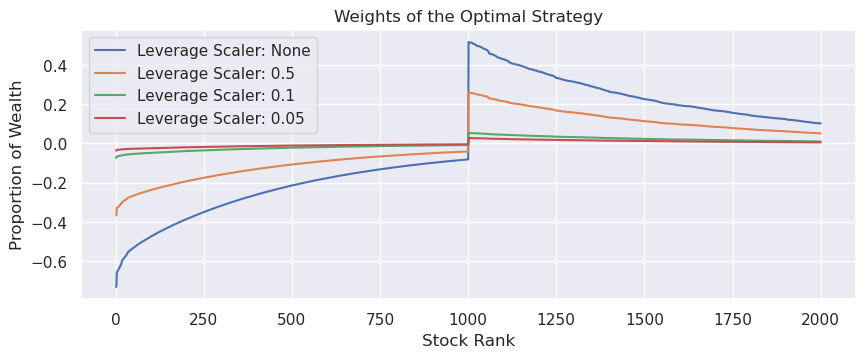

In [3]:
# Estimate a
method = 'direct_log'
smooth_method = 'exponential_decay'
smooth_parameter = 1
smooth_a = False

a = estimate_a(df_a_estimation.weights_by_rank, smooth_method=smooth_method, smooth_parameter=smooth_parameter, smooth_a=smooth_a)

# Define the leverage scalers
leverage_scalers = [None, 0.5, 0.1, 0.05]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 3.5))

# Compute and plot Strategy
setting = 'mixed'
N = 1000
plot_date = '2013-03-28'

for leverage_scaler in leverage_scalers:
    strategy = compute_weights_optimal_open(setting=setting, N=N, a=a, weights_by_rank=df_backtest.weights_by_rank, 
                                            leverage_scaler=leverage_scaler)
    ax.plot(strategy.loc[plot_date], label=f'Leverage Scaler: {leverage_scaler}')

# Configure plot
ax.set_title('Weights of the Optimal Strategy')
ax.set_xlabel("Stock Rank")
ax.set_ylabel("Proportion of Wealth")
ax.legend()

# Show plot
plt.show()


### Strategies Plot

/home/pedro/Downloads/mathematical_finance/2-notebooks/../src/a_estimation.py:25: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


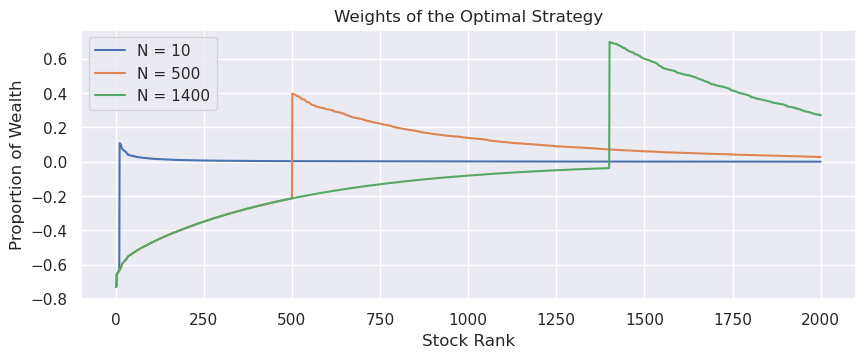

In [4]:
# Estimate a
method = 'direct_log'
smooth_method = 'exponential_decay'
smooth_parameter = 1
smooth_a = False

a = estimate_a(df_a_estimation.weights_by_rank, smooth_method=smooth_method, smooth_parameter=smooth_parameter, smooth_a=smooth_a)

# Define the list of N values
N_values = [10, 500, 1400]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 3.5))

# Compute and plot Strategy
setting = 'mixed'
leverage_scaler = None
plot_date = '2013-03-28'

for N in N_values:
    strategy = compute_weights_optimal_open(setting=setting, N=N, a=a, weights_by_rank=df_backtest.weights_by_rank, 
                                            leverage_scaler=leverage_scaler)
    ax.plot(strategy.loc[plot_date], label=f'N = {N}')

# Configure plot
ax.set_title('Weights of the Optimal Strategy')
ax.set_xlabel("Stock Rank")
ax.set_ylabel("Proportion of Wealth")
ax.legend()

# Show plot
plt.show()

### Different Leverage Scalers Final Wealth

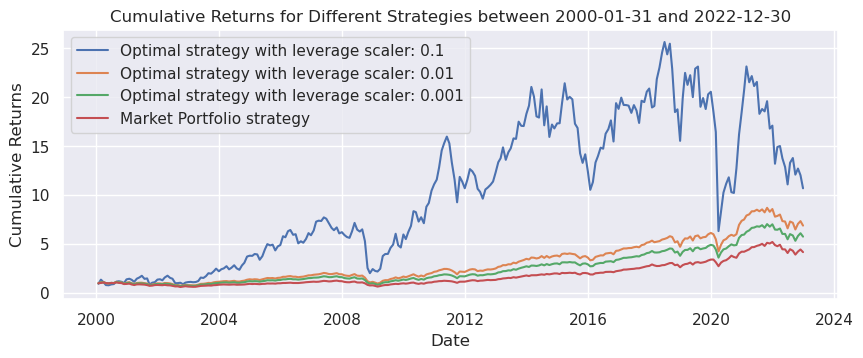

In [10]:
# List of different leverage scalers
leverage_scalers = [0.1, 0.01, 0.001]
fig, ax = plt.subplots(figsize=(10, 3.5))

# Compute Strategy
risk_free_rate=0 
setting = 'mixed'
N = 100

# Dictionary to store cumulative returns for each scaler
cumulative_rets_dict = {}

for leverage_scaler in leverage_scalers:
    strategy= compute_weights_optimal_open(setting=setting, N=N, a=a, weights_by_rank=df_backtest.weights_by_rank, leverage_scaler=leverage_scaler)
    backtest = Backtest(strategy=strategy, weights_permno_by_rank=df_backtest.weights_permno_by_rank, 
                        returns_by_permno=df_backtest.returns_by_permno, risk_free_rate=risk_free_rate)
    backtest.run()
    cumulative_rets_dict[leverage_scaler] = backtest.cumulative_rets

    # Plot the cumulative returns for the current scaler
    ax.plot(backtest.dates, backtest.cumulative_rets, label=f"Optimal strategy with leverage scaler: {leverage_scaler}")

# Adding the market portfolio strategy
strategy_market = compute_weights_market_portfolio(weights_by_rank=df_backtest.weights_by_rank)
backtest_market = Backtest(strategy=strategy_market, weights_permno_by_rank=df_backtest.weights_permno_by_rank, 
                           returns_by_permno=df_backtest.returns_by_permno, risk_free_rate=risk_free_rate)
backtest_market.run()
ax.plot(backtest_market.dates, backtest_market.cumulative_rets, label=f"Market Portfolio strategy")

ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Returns")
ax.set_title(f"Cumulative Returns for Different Strategies between {backtest.first_date} and {backtest.last_date}")
ax.legend()

plt.show()
plt.close()

### Different Leverage Scalers Log Wealth

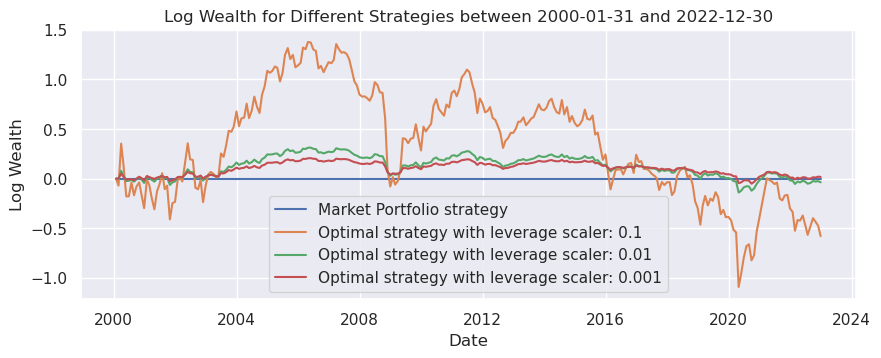

In [11]:
# List of different leverage scalers
leverage_scalers = [0.1, 0.01, 0.001]
fig, ax = plt.subplots(figsize=(10, 3.5))

# Compute Strategy
risk_free_rate=0 
setting = 'mixed'
N = 100

# Dictionary to store cumulative returns for each scaler
cumulative_rets_dict = {}

# Adding the market portfolio strategy
strategy_market = compute_weights_market_portfolio(weights_by_rank=df_backtest.weights_by_rank)
backtest = Backtest(strategy=strategy_market, weights_permno_by_rank=df_backtest.weights_permno_by_rank, 
                    returns_by_permno=df_backtest.returns_by_permno, risk_free_rate=risk_free_rate)
backtest_market.backtest_log_wealth()
ax.plot(backtest_market.dates, backtest_market.cumulative_log_wealths, label=f"Market Portfolio strategy")

for leverage_scaler in leverage_scalers:
    strategy= compute_weights_optimal_open(setting=setting, N=N, a=a, weights_by_rank=df_backtest.weights_by_rank, leverage_scaler=leverage_scaler)
    backtest.set_strategy(strategy)
    backtest.backtest_log_wealth()
    cumulative_rets_dict[leverage_scaler] = backtest.cumulative_log_wealths

    # Plot the cumulative returns for the current scaler
    ax.plot(backtest.dates, backtest.cumulative_log_wealths, label=f"Optimal strategy with leverage scaler: {leverage_scaler}")

ax.set_xlabel("Date")
ax.set_ylabel("Log Wealth")
ax.set_title(f"Log Wealth for Different Strategies between {backtest.first_date} and {backtest.last_date}")
ax.legend()

plt.show()
plt.close()